# Dwilaras Athina
## German Credit Case 
#### 9th September 2019

In [416]:
# Step 1. Memanggil Library yang dibutuhkan 

%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
import seaborn as sns

In [417]:
# Step 2. Memanggil dataset 
dataset = pd.read_csv('german_credit_data.csv')
dataset.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


Note
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

## Exploratory Data Analysis

In [418]:
dataset.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [419]:
dataset.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [8]:
dataset.Age.value_counts()

27    51
26    50
23    48
24    44
28    43
25    41
35    40
30    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
46    18
41    17
43    17
44    17
47    17
45    15
21    14
49    14
20    14
48    12
50    12
54    10
52     9
57     9
55     8
63     8
51     8
53     7
61     7
60     6
58     5
64     5
65     5
66     5
74     4
67     3
68     3
56     3
59     3
75     2
62     2
19     2
70     1
Name: Age, dtype: int64

In [32]:
dataset['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

Text(0.5,0,'AGE')

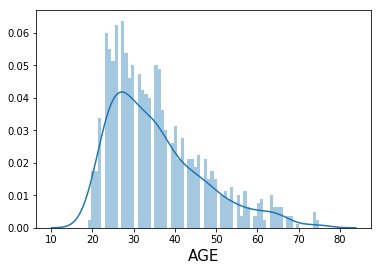

In [11]:
# Distribution of Age
a=sns.distplot(dataset.Age, bins=70)
a.set_xlabel("AGE", fontsize=15)

In this case, we will not consider about Age, and Sex. And I will delete all data which contain missing data. 

In [365]:
dataset=dataset.drop(columns=['Unnamed: 0','Age','Sex'])

In [420]:
dataset=dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 999
Data columns (total 10 columns):
Unnamed: 0          522 non-null int64
Age                 522 non-null int64
Sex                 522 non-null object
Job                 522 non-null int64
Housing             522 non-null object
Saving accounts     522 non-null object
Checking account    522 non-null object
Credit amount       522 non-null int64
Duration            522 non-null int64
Purpose             522 non-null object
dtypes: int64(5), object(5)
memory usage: 44.9+ KB


There are 522 data we will analyze. 

In [36]:
dataset.head()

,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,2,own,little,moderate,5951,48,radio/TV
3,2,free,little,little,7882,42,furniture/equipment
4,2,free,little,little,4870,24,car
7,3,rent,little,moderate,6948,36,car
9,3,own,little,moderate,5234,30,car


For department business benefit, we will make some clusters with the following conditions of customers:

TYPE A : 
1. Skilled (2) and High Skilled(3) Job
2. Own Housing
3. Quite rich and rich in saving accounts


TYPE B : 
1. Unskilled and non-resident, unskilled and resindent Job
2. Rent or Free housing
3. little and moderate in saving accounts

## Dataset A

In [367]:
datasetA=dataset[(dataset.Job==2)|(dataset.Job==3)]
datasetA=datasetA[(dataset.Housing=='own')]
datasetA=datasetA[(dataset['Saving accounts']=='quite rich')|(dataset['Saving accounts']=='rich')]

C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [368]:
datasetA

,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
30,2,own,rich,moderate,1913,18,business
41,2,own,quite rich,moderate,1158,12,radio/TV
67,2,own,rich,moderate,1007,12,car
94,2,own,rich,moderate,1318,12,car
109,2,own,quite rich,moderate,1410,14,business
114,2,own,quite rich,little,1680,12,radio/TV
118,2,own,quite rich,little,4281,33,furniture/equipment
119,3,own,quite rich,moderate,2366,12,car
167,2,own,rich,moderate,1577,11,furniture/equipment
177,2,own,quite rich,little,338,6,radio/TV


In [315]:
datasetA=datasetA.drop(columns=['Job','Housing','Saving accounts'])


In [316]:
datasetA=datasetA.replace({'little': 0, 'moderate': 1, 'rich':2})

In [317]:
datasetA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 30 to 945
Data columns (total 4 columns):
Checking account    25 non-null int64
Credit amount       25 non-null int64
Duration            25 non-null int64
Purpose             25 non-null object
dtypes: int64(3), object(1)
memory usage: 1000.0+ bytes


In [318]:
datasetAnopurpose=datasetA.drop(columns='Purpose')
datasetAnopurpose

,Checking account,Credit amount,Duration
30,1,1913,18
41,1,1158,12
67,1,1007,12
94,1,1318,12
109,1,1410,14
114,0,1680,12
118,0,4281,33
119,1,2366,12
167,1,1577,11
177,0,338,6


## Dataset B

In [404]:
datasetB=dataset[(dataset.Job==0)|(dataset.Job==1)]
datasetB=datasetB[(dataset.Housing=='rent')|(dataset.Housing=='free')]
datasetB=datasetB[(dataset['Saving accounts']=='little')|(dataset['Saving accounts']=='moderate')]

C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [392]:
datasetB

,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
22,1,rent,little,little,2241,10,car
44,1,free,little,little,6143,48,car
59,1,rent,little,little,6229,36,furniture/equipment
112,1,rent,little,moderate,6260,18,car
139,1,rent,little,rich,1881,12,radio/TV
187,0,free,little,moderate,1175,16,car
191,1,free,moderate,moderate,3844,48,business
218,1,rent,little,little,3021,24,furniture/equipment
237,1,rent,moderate,moderate,2767,21,business
309,1,rent,little,moderate,276,9,car


In [393]:
datasetB=datasetB.drop(columns=['Job','Housing','Saving accounts'])
datasetB=datasetB.replace({'little': 0, 'moderate': 1, 'rich':2})

In [394]:
datasetBnopurpose=datasetB.drop(columns='Purpose')
datasetBnopurpose

,Checking account,Credit amount,Duration
22,0,2241,10
44,0,6143,48
59,0,6229,36
112,1,6260,18
139,2,1881,12
187,1,1175,16
191,1,3844,48
218,0,3021,24
237,1,2767,21
309,1,276,9


## K-Means Clustering for Dataset A

In [322]:
# Step 3. Konversi Dataset ke Data Array 
X = np.asarray(datasetAnopurpose)

In [323]:
X

array([[    1,  1913,    18],
       [    1,  1158,    12],
       [    1,  1007,    12],
       [    1,  1318,    12],
       [    1,  1410,    14],
       [    0,  1680,    12],
       [    0,  4281,    33],
       [    1,  2366,    12],
       [    1,  1577,    11],
       [    0,   338,     6],
       [    1, 10961,    48],
       [    1,  2745,    21],
       [    0,  2659,    18],
       [    1,  2326,    15],
       [    2,   939,    12],
       [    1,  1512,    15],
       [    2,  2360,    15],
       [    0,  2828,    24],
       [    0,  3357,    21],
       [    1,  3496,    30],
       [    0,  3651,    12],
       [    2,  1275,    24],
       [    0,  2483,    24],
       [    1,  1322,    11],
       [    1,  8358,    48]], dtype=int64)

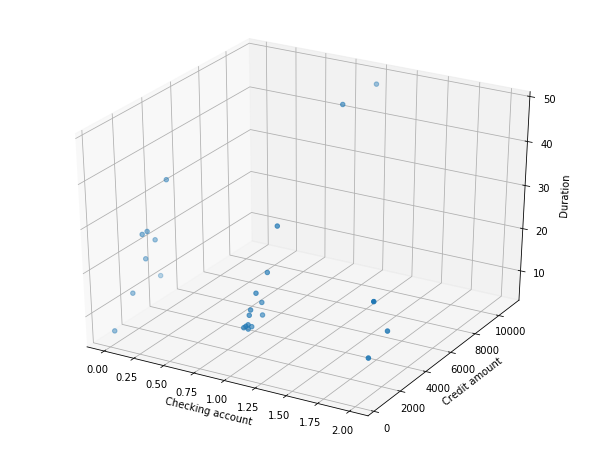

In [324]:
## Step 4. Menampilkan data ke dalam grafik scatterplot 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8,6))
plt.clf()

ax=Axes3D(fig)
plt.cla()
ax.set_xlabel("Checking account")
ax.set_ylabel("Credit amount")
ax.set_zlabel("Duration")

ax.scatter(X[:,0],X[:,1],X[:,2], label = 'True Position')

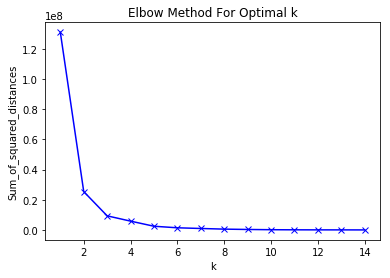

In [90]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the Sum_of_squared_distances above, conclude that k=3

In [325]:
# Step 5. Melakukan aktivasi algoritma K-Means 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [326]:
# Step 6. Menampilkan nilai centroid yang dibangkitkan oleh algoritma kmeans 
print(kmeans.cluster_centers_)

[[1.00000000e+00 1.28741667e+03 1.32500000e+01]
 [1.00000000e+00 9.65950000e+03 4.80000000e+01]
 [5.45454545e-01 2.95927273e+03 2.04545455e+01]]


In [327]:
print(kmeans.labels_)

[0 0 0 0 0 0 2 2 0 0 1 2 2 2 0 0 2 2 2 2 2 0 2 0 1]


In [328]:
#Input cluster to datasetA
datasetA['cluster'] = kmeans.labels_
datasetA

,Checking account,Credit amount,Duration,Purpose,cluster
30,1,1913,18,business,0
41,1,1158,12,radio/TV,0
67,1,1007,12,car,0
94,1,1318,12,car,0
109,1,1410,14,business,0
114,0,1680,12,radio/TV,0
118,0,4281,33,furniture/equipment,2
119,1,2366,12,car,2
167,1,1577,11,furniture/equipment,0
177,0,338,6,radio/TV,0


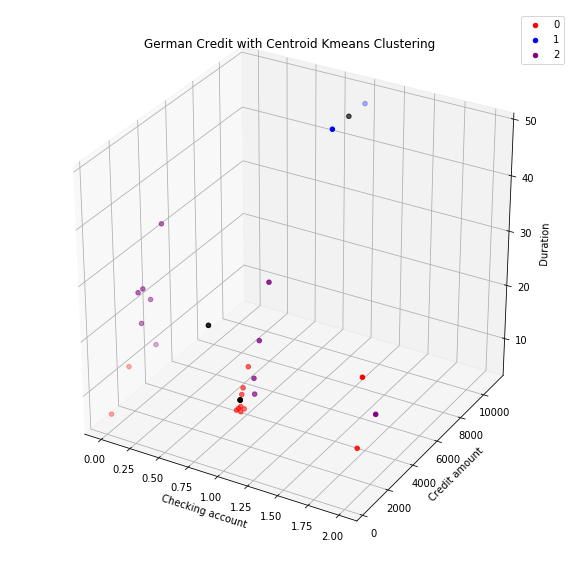

In [162]:
# Visualization of centroid
x = X[:,0]
x1 = X[:,1]
x2 = X[:,2]
group= kmeans.labels_
color = ['red','blue','purple']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(kmeans.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
    ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],color='black')
ax.legend()
ax.set_xlabel("Checking account")
ax.set_ylabel("Credit amount")
ax.set_zlabel("Duration")
plt.title("German Credit with Centroid Kmeans Clustering")
plt.show()


## Summary for K-Means Clustering in Dataset A

Remember that Data set A contains :
1. Skilled and High Skilled Job
2. Own Housing
3. Quite rich and rich in saving accounts

In [158]:
datasetA0=datasetA[(datasetA.cluster==0)]
datasetA1=datasetA[(datasetA.cluster==1)]
datasetA2=datasetA[(datasetA.cluster==2)]

In [159]:
datasetA0

,Checking account,Credit amount,Duration,Purpose,cluster
30,1,1913,18,business,0
41,1,1158,12,radio/TV,0
67,1,1007,12,car,0
94,1,1318,12,car,0
109,1,1410,14,business,0
114,0,1680,12,radio/TV,0
167,1,1577,11,furniture/equipment,0
177,0,338,6,radio/TV,0
409,2,939,12,car,0
449,1,1512,15,repairs,0


We can see that Cluster 0 is cluster for person whose low credit amount, and there are few of duration to pay the credit. These person likely a business person, or ordinary people who will pay the credit for car/repairs every month. Then, we can treat them to giving a insurance for their car, or give them a loan for their business. In this cluster, we conclude they have low risk.

In [163]:
datasetA1

,Checking account,Credit amount,Duration,Purpose,cluster
226,1,10961,48,radio/TV,1
945,1,8358,48,car,1


We can see that Cluster 1 is cluster for person whose moderate checking account, high credit amount, and long of duration to pay. We can treat them to giving notification emails more than others. Or, we can make an information call. If they are making duration of buy credit longer than before, we have to stop the credit. In this cluster, we conclude they have high risk.

In [164]:
datasetA2

,Checking account,Credit amount,Duration,Purpose,cluster
118,0,4281,33,furniture/equipment,2
119,1,2366,12,car,2
299,1,2745,21,furniture/equipment,2
323,0,2659,18,furniture/equipment,2
388,1,2326,15,business,2
506,2,2360,15,car,2
605,0,2828,24,furniture/equipment,2
612,0,3357,21,radio/TV,2
666,1,3496,30,furniture/equipment,2
689,0,3651,12,car,2


We can see that Cluster 2 is cluster for person whose medium credit amount, and average of duration to pay. These person likely a sales person. Then, we can treat them to giving a discount for many purchase. We also can give them a link for the best distributor. In this cluster, we conclude they have medium risk.

## K-Means Clustering for Dataset B

In [395]:
# Step 3. Konversi Dataset ke Data Array 
X = np.asarray(datasetBnopurpose)

In [396]:
X

array([[   0, 2241,   10],
       [   0, 6143,   48],
       [   0, 6229,   36],
       [   1, 6260,   18],
       [   2, 1881,   12],
       [   1, 1175,   16],
       [   1, 3844,   48],
       [   0, 3021,   24],
       [   1, 2767,   21],
       [   1,  276,    9],
       [   0, 3599,   21],
       [   0, 1190,   18],
       [   0, 1659,   24],
       [   0, 2122,   12],
       [   0, 1546,   24],
       [   0, 3234,   24],
       [   1, 2384,   36],
       [   1, 2718,   24],
       [   1, 1837,   24],
       [   2, 1240,   10],
       [   0,  684,   12],
       [   0, 2384,   24],
       [   0, 1987,   24],
       [   1, 4280,   30],
       [   1,  841,   12],
       [   1, 1795,   18],
       [   1, 1778,   15],
       [   0, 1442,   18],
       [   0, 1193,   24]], dtype=int64)

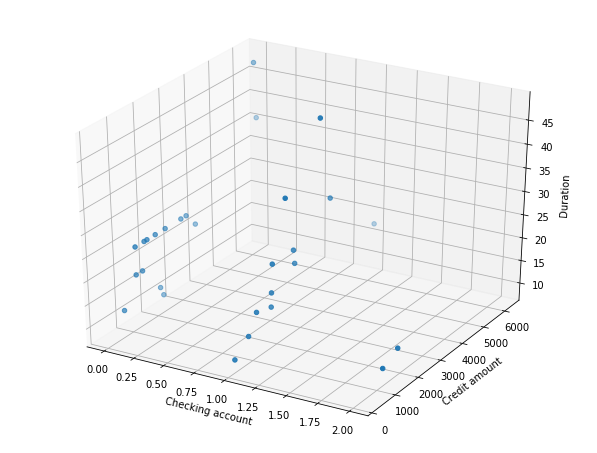

In [397]:
## Step 4. Menampilkan data ke dalam grafik scatterplot 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8,6))
plt.clf()

ax=Axes3D(fig)
plt.cla()
ax.set_xlabel("Checking account")
ax.set_ylabel("Credit amount")
ax.set_zlabel("Duration")

ax.scatter(X[:,0],X[:,1],X[:,2], label = 'True Position')

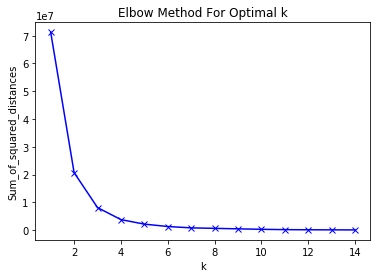

In [398]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the Sum_of_squared_distances above, conclude that k=3

In [399]:
# Step 5. Melakukan aktivasi algoritma K-Means 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [380]:
# Step 6. Menampilkan nilai centroid yang dibangkitkan oleh algoritma kmeans 
print(kmeans.cluster_centers_)

[[5.78947368e-01 1.56078947e+03 1.80000000e+01]
 [3.33333333e-01 6.21066667e+03 3.40000000e+01]
 [5.71428571e-01 3.35185714e+03 2.74285714e+01]]


In [400]:
print(kmeans.labels_)

[0 1 1 1 0 0 2 2 2 0 2 0 0 0 0 2 2 2 0 0 0 2 0 2 0 0 0 0 0]


In [401]:
#Input cluster to datasetB
datasetB['cluster'] = kmeans.labels_
datasetB

,Checking account,Credit amount,Duration,Purpose,cluster
22,0,2241,10,car,0
44,0,6143,48,car,1
59,0,6229,36,furniture/equipment,1
112,1,6260,18,car,1
139,2,1881,12,radio/TV,0
187,1,1175,16,car,0
191,1,3844,48,business,2
218,0,3021,24,furniture/equipment,2
237,1,2767,21,business,2
309,1,276,9,car,0


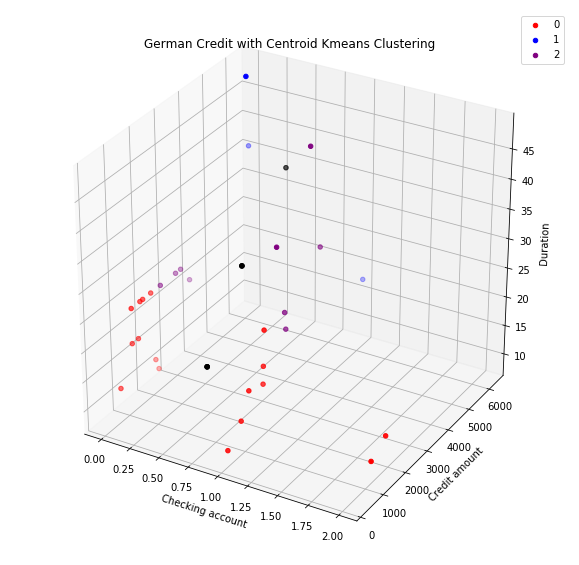

In [177]:
# Visualization of centroid
x = X[:,0]
x1 = X[:,1]
x2 = X[:,2]
group= kmeans.labels_
color = ['red','blue','purple']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(kmeans.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
    ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],color='black')
ax.legend()
ax.set_xlabel("Checking account")
ax.set_ylabel("Credit amount")
ax.set_zlabel("Duration")
plt.title("German Credit with Centroid Kmeans Clustering")
plt.show()


## Summary for K-Means Clustering in Dataset B

Remember that Data set A contains :
1. Unskilled and non-resident, unskilled and resindent Job
2. Rent or Free housing
3. little and moderate in saving accounts

In [178]:
datasetB0=datasetB[(datasetB.cluster==0)]
datasetB1=datasetB[(datasetB.cluster==1)]
datasetB2=datasetB[(datasetB.cluster==2)]

In [179]:
datasetB0

,Checking account,Credit amount,Duration,Purpose,cluster
22,0,2241,10,car,0
139,2,1881,12,radio/TV,0
187,1,1175,16,car,0
309,1,276,9,car,0
429,0,1190,18,repairs,0
466,0,1659,24,radio/TV,0
494,0,2122,12,car,0
561,0,1546,24,radio/TV,0
602,1,1837,24,education,0
611,2,1240,10,car,0


We can see that Cluster 0 is cluster for person (mostly) whose low credit amount, and there are short of duration to pay. These person likely ordinary people who will pay the credit for car/radio/TV/education every month. Then, we can treat them to giving a insurance for their car, or give them more loan for their business. In this cluster, we conclude they have low risk.

In [180]:
datasetB1

,Checking account,Credit amount,Duration,Purpose,cluster
44,0,6143,48,car,1
59,0,6229,36,furniture/equipment,1
112,1,6260,18,car,1


We can see that Cluster 1 is cluster for person whose low checking account, high credit amount, and long of duration to pay. This is terrible. Person whose unskilled and resindent in their Job, Rent or Free housing, little and moderate in saving accounts, having high credit amount. We can treat them to giving notification emails more than others. Or, we can make an information call. If they are making duration of buy credit longer than before, we have to stop the credit. In this cluster, we conclude they have high risk.

In [181]:
datasetB2

,Checking account,Credit amount,Duration,Purpose,cluster
191,1,3844,48,business,2
218,0,3021,24,furniture/equipment,2
237,1,2767,21,business,2
341,0,3599,21,furniture/equipment,2
570,0,3234,24,furniture/equipment,2
583,1,2384,36,repairs,2
593,1,2718,24,car,2
678,0,2384,24,radio/TV,2
739,1,4280,30,business,2


We can see that Cluster 2 is cluster for person whose medium credit amount, and long of duration to pay. These person likely a sales person in furniture/equipment.We can treat them to giving a discount for many purchase. We also can give them a link for the best distributor to make their business runing well. In this cluster, we conclude they have medium risk.

## Hierarchical Clustering for Dataset A

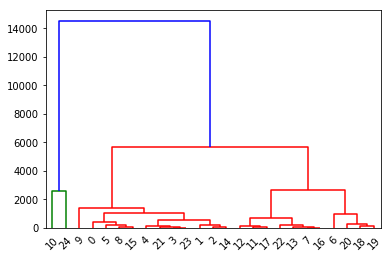

In [182]:
# Step 3. Konversi Dataset ke Data Array 
X = np.asarray(datasetAnopurpose)

# Step 5. Membentuk dendogram dengan metode ward 
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

There are 2 cluster based on dendogram above

In [185]:
# Melakukan fitting hierarchical clustering 
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

In [186]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

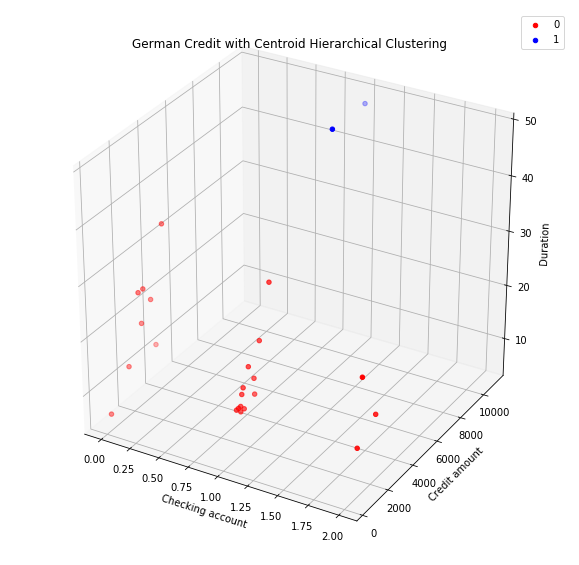

In [191]:
# Visualization of the result
x = X[:,0]
x1 = X[:,1]
x2 = X[:,2]
group= model.labels_
color = ['red','blue','purple']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(model.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
    #ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],color='black')
ax.legend()
ax.set_xlabel("Checking account")
ax.set_ylabel("Credit amount")
ax.set_zlabel("Duration")
plt.title("German Credit with Centroid Hierarchical Clustering")
plt.show()

In [198]:
#Input cluster to datasetA
datasetA['cluster'] = model.labels_
datasetA

,Checking account,Credit amount,Duration,Purpose,cluster
30,1,1913,18,business,0
41,1,1158,12,radio/TV,0
67,1,1007,12,car,0
94,1,1318,12,car,0
109,1,1410,14,business,0
114,0,1680,12,radio/TV,0
118,0,4281,33,furniture/equipment,0
119,1,2366,12,car,0
167,1,1577,11,furniture/equipment,0
177,0,338,6,radio/TV,0


## Summary for Hierarchical Clustering for Dataset A

In this algorithm, dataset A online splitted in two clusters. Cluster 1 for person who paid the credit in longer time than others. This clustering is not better than K-Means Clustering.  

## Hierarchical Clustering for Dataset B

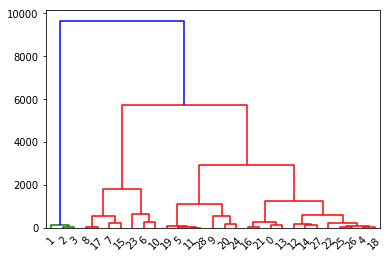

In [200]:
# Step 3. Konversi Dataset ke Data Array 
X = np.asarray(datasetBnopurpose)

# Step 5. Membentuk dendogram dengan metode ward 
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

There are 2 cluster based on dendogram above

In [203]:
# Melakukan fitting hierarchical clustering 
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

In [205]:
labels

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

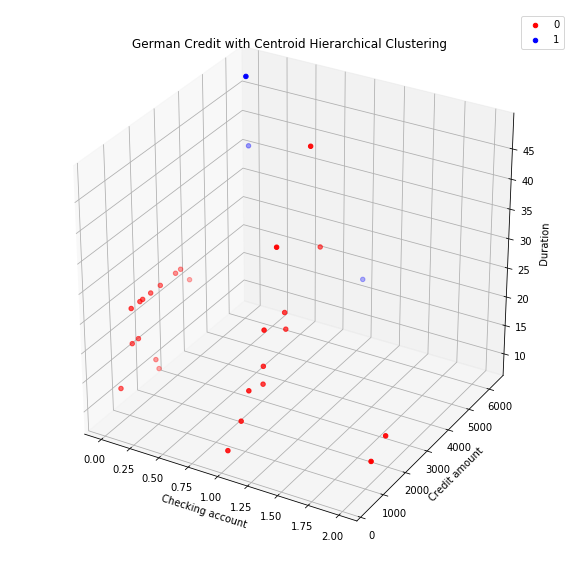

In [206]:
# Visualization of the result
x = X[:,0]
x1 = X[:,1]
x2 = X[:,2]
group= model.labels_
color = ['red','blue','purple']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(model.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
    #ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],color='black')
ax.legend()
ax.set_xlabel("Checking account")
ax.set_ylabel("Credit amount")
ax.set_zlabel("Duration")
plt.title("German Credit with Centroid Hierarchical Clustering")
plt.show()

In [211]:
#Input cluster to datasetB
datasetB['cluster'] = model.labels_
datasetB

,Checking account,Credit amount,Duration,Purpose,cluster
22,0,2241,10,car,0
44,0,6143,48,car,1
59,0,6229,36,furniture/equipment,1
112,1,6260,18,car,1
139,2,1881,12,radio/TV,0
187,1,1175,16,car,0
191,1,3844,48,business,0
218,0,3021,24,furniture/equipment,0
237,1,2767,21,business,0
309,1,276,9,car,0


## Summary for Hierarchical Clustering for Dataset B

In this algorithm, dataset B only splitted in two clusters. Cluster 1 for person whose high credit amount than others. This clustering is not better than K-Means Clustering.  

## DBSCAN Clustering for Dataset A

In [212]:
from sklearn.cluster import DBSCAN
from sklearn import datasets

In [239]:
# Step 3. Konversi Dataset ke Data Array 
X = np.asarray(datasetAnopurpose)
X

array([[1.        , 7.55642797, 2.89037176],
       [1.        , 7.05444966, 2.48490665],
       [1.        , 6.91473089, 2.48490665],
       [1.        , 7.18387072, 2.48490665],
       [1.        , 7.25134498, 2.63905733],
       [0.        , 7.42654907, 2.48490665],
       [0.        , 8.36194191, 3.49650756],
       [1.        , 7.76895604, 2.48490665],
       [1.        , 7.36327959, 2.39789527],
       [0.        , 5.8230459 , 1.79175947],
       [1.        , 9.3020988 , 3.87120101],
       [1.        , 7.91753635, 3.04452244],
       [0.        , 7.88570539, 2.89037176],
       [1.        , 7.75190533, 2.7080502 ],
       [2.        , 6.84481548, 2.48490665],
       [1.        , 7.32118856, 2.7080502 ],
       [2.        , 7.7664169 , 2.7080502 ],
       [0.        , 7.94732503, 3.17805383],
       [0.        , 8.118803  , 3.04452244],
       [1.        , 8.15937474, 3.40119738],
       [0.        , 8.20275638, 2.48490665],
       [2.        , 7.15070146, 3.17805383],
       [0.

In [237]:
# Making X to the value OF log (X)
datasetAnopurpose['CA_log']=np.log(X[:,1])
datasetAnopurpose['Dur_log']=np.log(X[:,2])
datasetAnopurpose=datasetAnopurpose.drop(columns=['Credit amount', 'Duration'])
datasetAnopurpose


,Checking account,CA_log,Dur_log
30,1,7.556428,2.890372
41,1,7.054450,2.484907
67,1,6.914731,2.484907
94,1,7.183871,2.484907
109,1,7.251345,2.639057
114,0,7.426549,2.484907
118,0,8.361942,3.496508
119,1,7.768956,2.484907
167,1,7.363280,2.397895
177,0,5.823046,1.791759


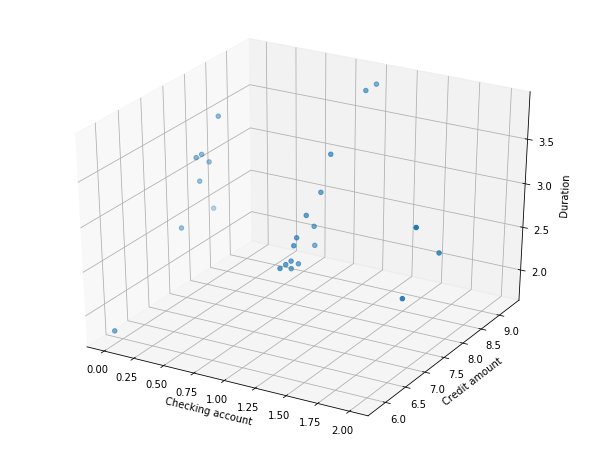

In [252]:
## Step 4. Menampilkan data ke dalam grafik scatterplot 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8,6))
plt.clf()

ax=Axes3D(fig)
plt.cla()
ax.set_xlabel("Checking account")
ax.set_ylabel("Credit amount")
ax.set_zlabel("Duration")

ax.scatter(X[:,0],X[:,1],X[:,2], label = 'True Position')

## Summary for DBSCAN for Dataset A

In [256]:
# Step 5. Melakukan aktivasi algoritma DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan.fit(X)

# Step 6. Menampilkan label dibangkitkan oleh algoritma dbscan 
print(dbscan.labels_)

[ 0  0  0  0  0 -1 -1  0  0 -1  1  0  2  0 -1  0 -1  2  2  0 -1 -1  2  0
  1]


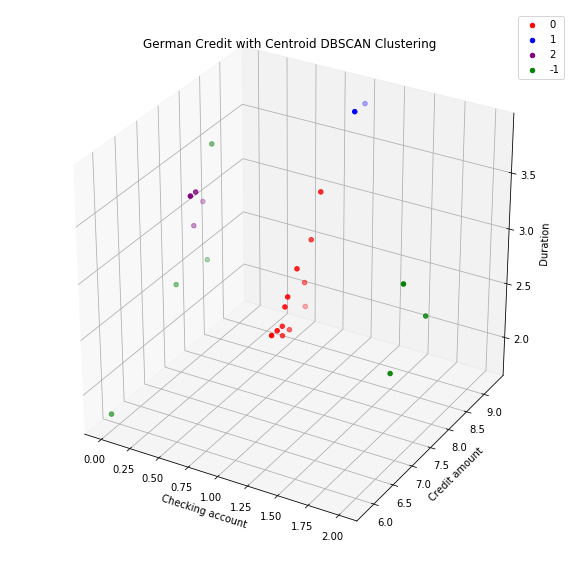

In [259]:
# Visualization of the result
x = X[:,0]
x1 = X[:,1]
x2 = X[:,2]
group= dbscan.labels_
color = ['red','blue','purple','green']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(dbscan.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Checking account")
ax.set_ylabel("Credit amount")
ax.set_zlabel("Duration")
plt.title("German Credit with Centroid DBSCAN Clustering")
plt.show()

In [266]:
#Input cluster to datasetA
datasetA['cluster'] = dbscan.labels_
datasetA

,Checking account,Credit amount,Duration,Purpose,cluster
30,1,1913,18,business,0
41,1,1158,12,radio/TV,0
67,1,1007,12,car,0
94,1,1318,12,car,0
109,1,1410,14,business,0
114,0,1680,12,radio/TV,-1
118,0,4281,33,furniture/equipment,-1
119,1,2366,12,car,0
167,1,1577,11,furniture/equipment,0
177,0,338,6,radio/TV,-1


In [267]:
datasetA0=datasetA[(datasetA.cluster==0)]
datasetA1=datasetA[(datasetA.cluster==1)]
datasetA2=datasetA[(datasetA.cluster==2)]
datasetAZ=datasetA[(datasetA.cluster==-1)]

In [268]:
datasetA0

,Checking account,Credit amount,Duration,Purpose,cluster
30,1,1913,18,business,0
41,1,1158,12,radio/TV,0
67,1,1007,12,car,0
94,1,1318,12,car,0
109,1,1410,14,business,0
119,1,2366,12,car,0
167,1,1577,11,furniture/equipment,0
299,1,2745,21,furniture/equipment,0
388,1,2326,15,business,0
449,1,1512,15,repairs,0


This result is almost the same result in K-Means Clustering; But, only moderate in checking account. Let see, they spend the credit mostly for furniture/equipment and car. The treaments we can give to them are giving a insurance for their car, or give them advertise for many kinds of furnitures. In this cluster, we conclude they have low risk.

In [269]:
datasetA1

,Checking account,Credit amount,Duration,Purpose,cluster
226,1,10961,48,radio/TV,1
945,1,8358,48,car,1


This result is the same result in K-Means Clustering and Hierarchical Clustering. In this cluster, we conclude they have high risk.

In [270]:
datasetA2

,Checking account,Credit amount,Duration,Purpose,cluster
323,0,2659,18,furniture/equipment,2
605,0,2828,24,furniture/equipment,2
612,0,3357,21,radio/TV,2
743,0,2483,24,furniture/equipment,2


This result is almost the same result in K-Means Clustering; But, only little in checking account. Let see, they spend the credit mostly for furniture/equipment. Credit amount is larger than cluster 0, and duration of paying credit is longer. 
The treaments we can give to them is making notification email for payment every month. In this cluster, we conclude they have medium risk.

In [271]:
datasetAZ

,Checking account,Credit amount,Duration,Purpose,cluster
114,0,1680,12,radio/TV,-1
118,0,4281,33,furniture/equipment,-1
177,0,338,6,radio/TV,-1
409,2,939,12,car,-1
506,2,2360,15,car,-1
689,0,3651,12,car,-1
729,2,1275,24,business,-1


This cluster we can call it "Noise" Customer. Because, from DBSCAN Clustering, they aren't clustered. For high checking account ,but few credit amount. Now we can see that the duration of payment is short. We can treat them with advertise more credit, maybe in the sector of new-house / appartment, new car, etc. Then, let see for little checking account. In moderate credit amount, but also short of duration in payment. We can treat them to buying another stuffs. 

## DBSCAN Clustering for Dataset B

In [279]:
# Making X to the value OF log (X)
datasetBnopurpose['CA_log']=np.log(X[:,1])
datasetBnopurpose['Dur_log']=np.log(X[:,2])
datasetBnopurpose=datasetBnopurpose.drop(columns=['Credit amount', 'Duration'])
datasetBnopurpose

,Checking account,CA_log,Dur_log
22,0,7.714677,2.302585
44,0,8.723069,3.871201
59,0,8.736971,3.583519
112,1,8.741935,2.890372
139,2,7.539559,2.484907
187,1,7.069023,2.772589
191,1,8.254269,3.871201
218,0,8.013343,3.178054
237,1,7.925519,3.044522
309,1,5.620401,2.197225


In [286]:
# Step 3. Konversi Dataset ke Data Array 
X = np.asarray(datasetBnopurpose)

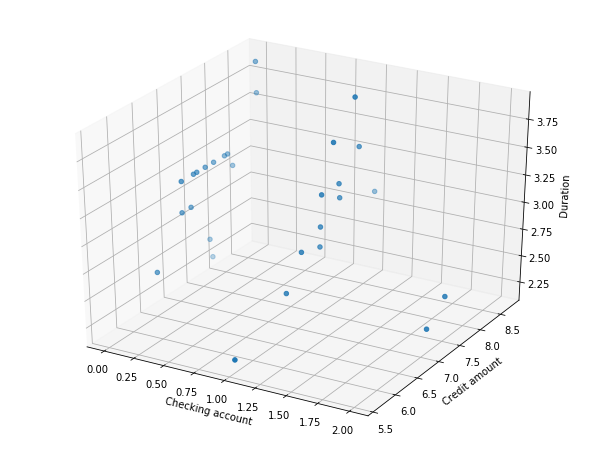

In [287]:
## Step 4. Menampilkan data ke dalam grafik scatterplot 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8,6))
plt.clf()

ax=Axes3D(fig)
plt.cla()
ax.set_xlabel("Checking account")
ax.set_ylabel("Credit amount")
ax.set_zlabel("Duration")

ax.scatter(X[:,0],X[:,1],X[:,2], label = 'True Position')

## Summary for DBSCAN for Dataset B

In [304]:
# Step 5. Melakukan aktivasi algoritma DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=2)
dbscan.fit(X)

# Step 6. Menampilkan label dibangkitkan oleh algoritma dbscan 
print(dbscan.labels_)

[ 0  1  1 -1 -1 -1 -1  2  3 -1  2  2  2  0  2  2 -1  3  3 -1 -1  2  2 -1
 -1  3  3  2  2]


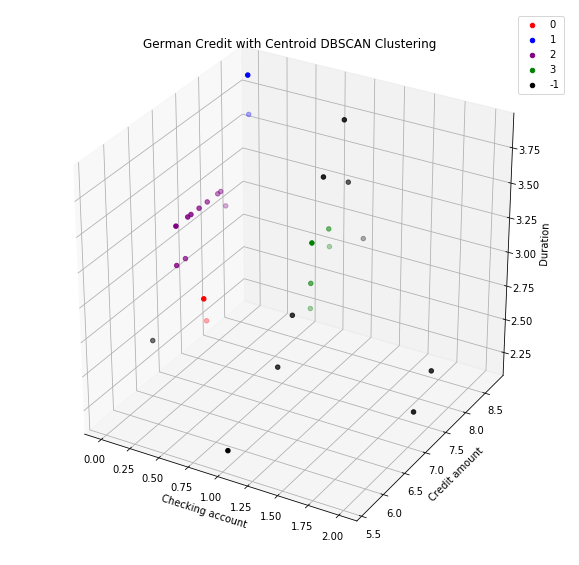

In [305]:
# Visualization of the result
x = X[:,0]
x1 = X[:,1]
x2 = X[:,2]
group= dbscan.labels_
color = ['red','blue','purple','green','black']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(dbscan.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Checking account")
ax.set_ylabel("Credit amount")
ax.set_zlabel("Duration")
plt.title("German Credit with Centroid DBSCAN Clustering")
plt.show()

In [306]:
#Input cluster to datasetB
datasetB['cluster'] = dbscan.labels_
datasetB

,Checking account,Credit amount,Duration,Purpose,cluster
22,0,2241,10,car,0
44,0,6143,48,car,1
59,0,6229,36,furniture/equipment,1
112,1,6260,18,car,-1
139,2,1881,12,radio/TV,-1
187,1,1175,16,car,-1
191,1,3844,48,business,-1
218,0,3021,24,furniture/equipment,2
237,1,2767,21,business,3
309,1,276,9,car,-1


In [307]:
datasetB0=datasetB[(datasetB.cluster==0)]
datasetB1=datasetB[(datasetB.cluster==1)]
datasetB2=datasetB[(datasetB.cluster==2)]
datasetB3=datasetB[(datasetB.cluster==3)]
datasetBZ=datasetB[(datasetB.cluster==-1)]

In [308]:
datasetB0

,Checking account,Credit amount,Duration,Purpose,cluster
22,0,2241,10,car,0
494,0,2122,12,car,0


Let see this cluster for checking account dataset B, little checking account, short of duration paying credit. 
We can give them a stimulation for saving their money, and give them advertise for insurance their car.  In this cluster, we conclude they have low risk.

In [309]:
datasetB1

,Checking account,Credit amount,Duration,Purpose,cluster
44,0,6143,48,car,1
59,0,6229,36,furniture/equipment,1


You can see this cluster is having high risk. Why? Because they are Unskilled and non-resident, unskilled and resindent Job, Rent or Free housing, little and moderate in saving accounts. But they have large credit amount. From the table above, we know that their duration of paying credit is too long. Like K-Means Clustering, we can give a treat them with notification emails more than others. Or, we can make an information call. If they are making duration of buy credit longer than before, we have to stop the credit.

In [310]:
datasetB2

,Checking account,Credit amount,Duration,Purpose,cluster
218,0,3021,24,furniture/equipment,2
341,0,3599,21,furniture/equipment,2
429,0,1190,18,repairs,2
466,0,1659,24,radio/TV,2
561,0,1546,24,radio/TV,2
570,0,3234,24,furniture/equipment,2
678,0,2384,24,radio/TV,2
731,0,1987,24,radio/TV,2
853,0,1442,18,car,2
972,0,1193,24,car,2


In this cluster, we conclude they have medium risk. In moderate credit amount, they pay shorter than cluster 1. 
We can give a treatment like discount for pay-early. 

In [311]:
datasetB3

,Checking account,Credit amount,Duration,Purpose,cluster
237,1,2767,21,business,3
593,1,2718,24,car,3
602,1,1837,24,education,3
801,1,1795,18,radio/TV,3
809,1,1778,15,car,3


In this cluster, we also conclude they have low risk. In moderate checking account, moderate credit amount, they pay shorter than cluster 1. We can give a treatment like discount for pay-early. And We also can give a treat for discount another stuffs. 

In [312]:
datasetBZ

,Checking account,Credit amount,Duration,Purpose,cluster
112,1,6260,18,car,-1
139,2,1881,12,radio/TV,-1
187,1,1175,16,car,-1
191,1,3844,48,business,-1
309,1,276,9,car,-1
583,1,2384,36,repairs,-1
611,2,1240,10,car,-1
649,0,684,12,education,-1
739,1,4280,30,business,-1
752,1,841,12,business,-1


This cluster we can call it "Noise" Customer. Because, from DBSCAN Clustering, they aren't clustered. 
- For high checking account, but few credit amount. Now we can see that the duration of payment is short. We can treat them with advertise more credit, maybe in the sector of new-house / appartment, new car, etc. But, don't forget, they are people subset of Dataset B. Don't too much give them advertise. 

- Then, let see for little checking account. In little credit amount, but also short of duration in payment. We can treat them to saving their money than advertise for another stuffs.

## Summary 

1. Assume that each rows represents 1 unique customer, perform customer segmentation using clustering techniques that you have learned during classes (KMeans, Hierarchical, and DBSCAN), so there will be minimum number of 3 segments that represents good, medium, and bad risks. Note: Three clusters is just an example, thus 4, 5, or 6 clusters is allowed.
2. At the end of your Jupyter Notebook, choose one clustering technique that you think is the best, elaborate your reason why this technique is the best. 
3. Based on the final clustering technique you have chosen, please describe each customer segments and elaborate more on what business client/department can get benefits from your clustering model

Answer No.2
- In this case, i think the besst clustering is K-Means Algorithm. Because all clusters have characteristic such as low, medium and high risk. 

In [369]:
clusterA

30        low
41        low
67        low
94        low
109       low
114       low
118    medium
119    medium
167       low
177       low
226      high
299    medium
323    medium
388    medium
409       low
449       low
506    medium
605    medium
612    medium
666    medium
689    medium
729       low
743    medium
875       low
945      high
Name: cluster, dtype: object

In [371]:
datasetA['cluster']=clusterA

In [372]:
datasetA

,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,cluster
30,2,own,rich,moderate,1913,18,business,low
41,2,own,quite rich,moderate,1158,12,radio/TV,low
67,2,own,rich,moderate,1007,12,car,low
94,2,own,rich,moderate,1318,12,car,low
109,2,own,quite rich,moderate,1410,14,business,low
114,2,own,quite rich,little,1680,12,radio/TV,low
118,2,own,quite rich,little,4281,33,furniture/equipment,medium
119,3,own,quite rich,moderate,2366,12,car,medium
167,2,own,rich,moderate,1577,11,furniture/equipment,low
177,2,own,quite rich,little,338,6,radio/TV,low


In [403]:
clusterB=datasetB['cluster'].replace({0:'low', 1:'high', 2:'medium'})

In [405]:
datasetB['cluster']=clusterB
datasetB

,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,cluster
22,1,rent,little,little,2241,10,car,low
44,1,free,little,little,6143,48,car,high
59,1,rent,little,little,6229,36,furniture/equipment,high
112,1,rent,little,moderate,6260,18,car,high
139,1,rent,little,rich,1881,12,radio/TV,low
187,0,free,little,moderate,1175,16,car,low
191,1,free,moderate,moderate,3844,48,business,medium
218,1,rent,little,little,3021,24,furniture/equipment,medium
237,1,rent,moderate,moderate,2767,21,business,medium
309,1,rent,little,moderate,276,9,car,low


In [415]:
#merge datasetA and datasetB to analyze whole data
dataresult=pd.concat([datasetA,datasetB])
dataresult

,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,cluster
30,2,own,rich,moderate,1913,18,business,low
41,2,own,quite rich,moderate,1158,12,radio/TV,low
67,2,own,rich,moderate,1007,12,car,low
94,2,own,rich,moderate,1318,12,car,low
109,2,own,quite rich,moderate,1410,14,business,low
114,2,own,quite rich,little,1680,12,radio/TV,low
118,2,own,quite rich,little,4281,33,furniture/equipment,medium
119,3,own,quite rich,moderate,2366,12,car,medium
167,2,own,rich,moderate,1577,11,furniture/equipment,low
177,2,own,quite rich,little,338,6,radio/TV,low


In [410]:
dataresult=dataresult.sort_index()

In [421]:
dataresult_cluster=pd.DataFrame(dataresult['cluster'].value_counts())

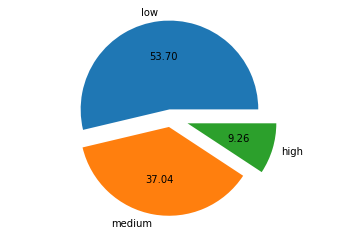

In [414]:
explode = (0.1, 0.1, 0.2)

plt.pie(dataresult_cluster['cluster'],labels=dataresult_cluster.index, autopct='%.2f', explode=explode)

plt.axis('equal')

plt.show()

From Dataset A and Dataset B, we know that 53,70% have low risk 37.04% have medium risk, and the other is have high risk. 

In [424]:
dataresult_Purpose=pd.DataFrame(dataresult['Purpose'].value_counts())
dataresult_Purpose
#plt.figure(figsize=(20,10))
#sns.countplot(dataresult_Purpose['Purpose'],order=dataresult_Purpose['Purpose'].value_counts().index)
#plt.xticks(rotation=45)

,Purpose
car,19
furniture/equipment,11
radio/TV,11
business,8
repairs,3
education,2


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

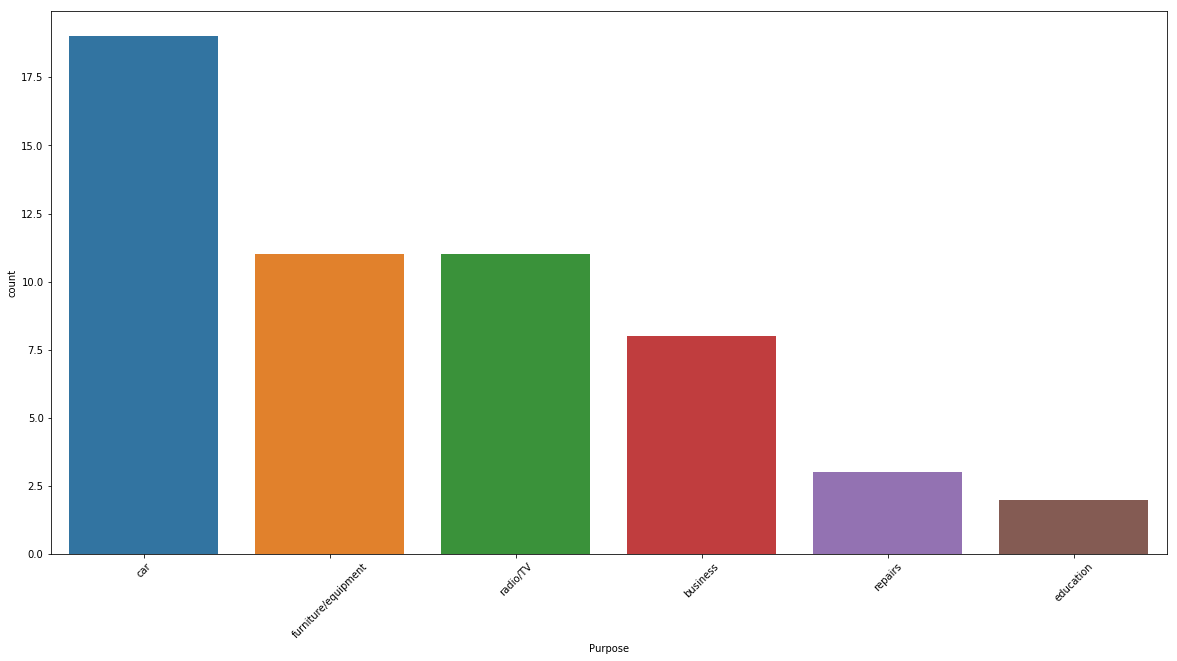

In [425]:
plt.figure(figsize=(20,10))

sns.countplot(dataresult['Purpose'],order=dataresult['Purpose'].value_counts().index)
plt.xticks(rotation=45)

From the countplot above, people in dataset A and dataset B used creditcard for car and furniture/equipment mostly. Then, we can improve our credit card features for those payment. 